In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-v0_8')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('climate_change.csv')

In [3]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [4]:
df.head(2)

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked
0,I'm afraid climate change is going to kill me!...,718,Will_Power,2019-02-14 00:22:32,534,0.98,aqdmbz,climatechange,False,Feeling scared? Have you been listening to or ...,True,False,True,False
1,The r/climatechange Verified User Flair Program,30,technologyisnatural,2022-08-21 20:53:23,14,0.91,wu9zny,climatechange,False,r/climatechange is a community centered around...,True,False,True,False


#### Numbers of groups over time

In [5]:
df.groupby(by='Time').agg('count').reset_index()

,Time,Title,Score,Autor,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked
0,2014-07-21 06:31:24,2,2,2,2,2,2,2,2,2,2,2,2,2
1,2014-08-02 18:41:22,1,1,0,1,1,1,1,1,0,1,1,1,1
2,2014-09-10 17:01:12,1,1,0,1,1,1,1,1,0,1,1,1,1
3,2014-09-20 22:17:54,1,1,1,1,1,1,1,1,0,1,1,1,1
4,2014-10-19 04:41:51,1,1,1,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,2023-11-13 14:38:39,1,1,1,1,1,1,1,1,0,1,1,1,1
9523,2023-11-13 14:39:39,1,1,1,1,1,1,1,1,0,1,1,1,1
9524,2023-11-13 14:43:51,1,1,1,1,1,1,1,1,0,1,1,1,1
9525,2023-11-13 14:47:04,1,1,1,1,1,1,1,1,0,1,1,1,1


In [6]:
 df[['Time']].apply(lambda x: type(x.dt))

Time    <class 'pandas.core.indexes.accessors.Datetime...
dtype: object

In [7]:
from datetime import datetime
df['YearMonth'] = df['Time'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))
df

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked,YearMonth
0,I'm afraid climate change is going to kill me!...,718,Will_Power,2019-02-14 00:22:32,534,0.98,aqdmbz,climatechange,False,Feeling scared? Have you been listening to or ...,True,False,True,False,2019-02-01
1,The r/climatechange Verified User Flair Program,30,technologyisnatural,2022-08-21 20:53:23,14,0.91,wu9zny,climatechange,False,r/climatechange is a community centered around...,True,False,True,False,2022-08-01
2,How come some environmentalists are against ca...,75,SnooMarzipans7682,2023-10-22 14:59:50,296,0.75,17dv720,climatechange,False,It seems like if we could capture all of the c...,True,False,False,False,2023-10-01
3,Solar and wind are better than nuclear,21,Consistent_Piano_210,2023-10-22 20:14:02,26,0.70,17e251o,climatechange,False,Taken from a discussion:\r\n\r\nNickel Iron ba...,True,False,False,False,2023-10-01
4,When will we hit 2 degrees of global warming?,9,ging289,2023-10-22 22:20:00,30,0.74,17e506w,climatechange,False,Now we can't avoid hitting 1.5 degrees so I as...,True,False,False,False,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,The climate refugees are here. They're Americans.,3,LudovicoSpecs,2020-09-15 14:32:41,0,0.80,it9xdc,ClimateChangeSurprise,False,NaN,False,False,False,False,2020-09-01
15971,Climate Change Is Moving the North Pole: As ic...,3,LudovicoSpecs,2020-01-21 06:48:14,0,0.72,erqwnh,ClimateChangeSurprise,False,NaN,False,False,False,False,2020-01-01
15972,Approximately 600 flights in the United States...,2,LudovicoSpecs,2023-06-16 15:18:32,0,0.63,14azk2v,ClimateChangeSurprise,False,NaN,False,False,False,False,2023-06-01
15973,Climate change likely to trigger frequent and ...,1,LudovicoSpecs,2022-07-31 16:51:54,0,0.56,wct7gy,ClimateChangeSurprise,False,NaN,False,False,False,False,2022-07-01


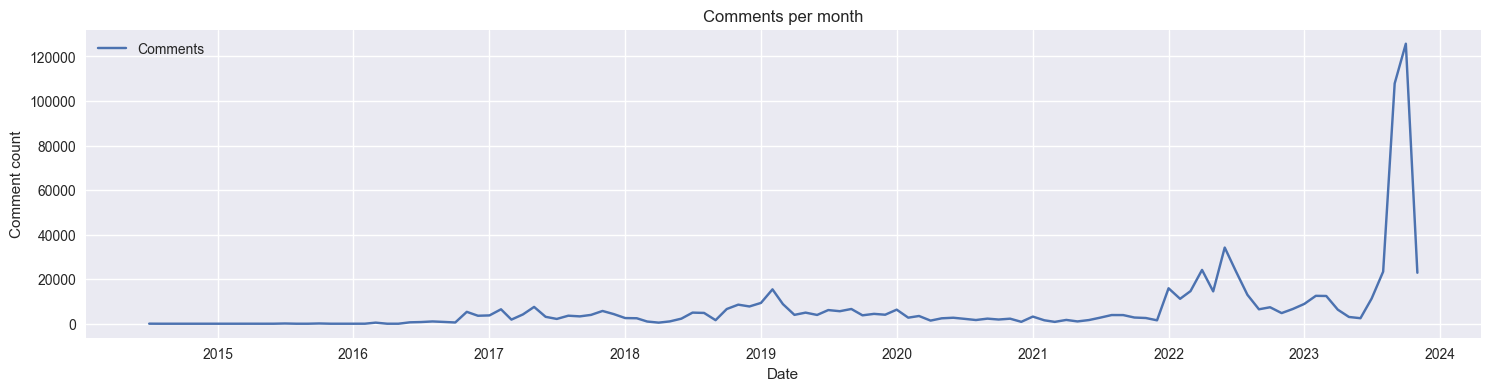

In [32]:
def plot_comment_per_day():
    
    # Group data
    data = df.groupby(by='YearMonth').agg({ 'Comments': 'sum' }).reset_index()
    
    # Draw
    plt.figure(figsize=(18, 4))
    plt.plot(data['YearMonth'], data['Comments'], label='Comments')
    plt.title('Comments per month')
    plt.xlabel('Date')
    plt.ylabel('Comment count')
    plt.legend()
    plt.show()

plot_comment_per_day()

#### Len of text vs score

C:\Users\acorr\AppData\Local\Temp\ipykernel_28432\3713835070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TextLength'] = data['SelfText'].apply(lambda x: len(str(x)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


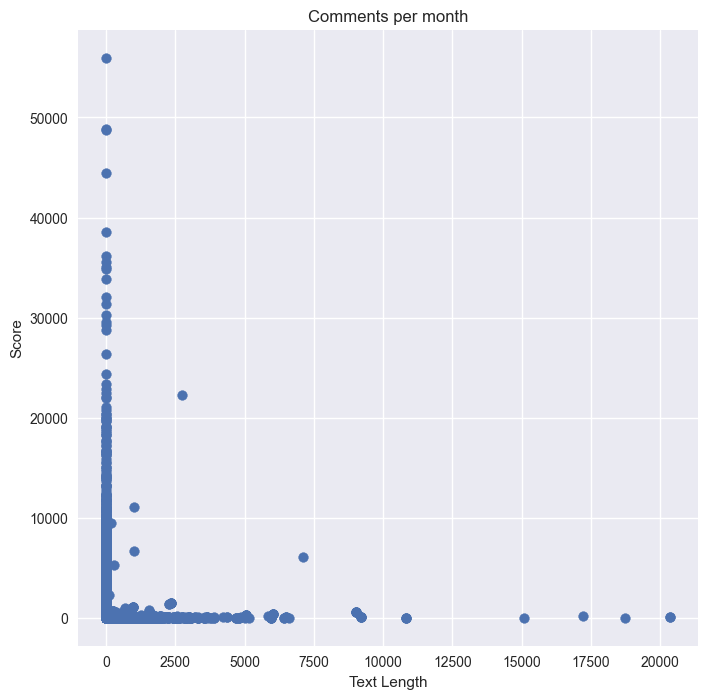

In [46]:
def plot_text_length_vs_score():
    
    # Group data
    data = df[['SelfText', 'Score']]
    data['TextLength'] = data['SelfText'].apply(lambda x: len(str(x)))

    # Draw
    plt.figure(figsize=(8, 8))
    plt.scatter(x=data['TextLength'], y=data['Score'])
    plt.title('Comments per month')
    plt.xlabel('Text Length')
    plt.ylabel('Score')
    plt.legend()
    plt.show();

plot_text_length_vs_score()

#### Score vs comments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


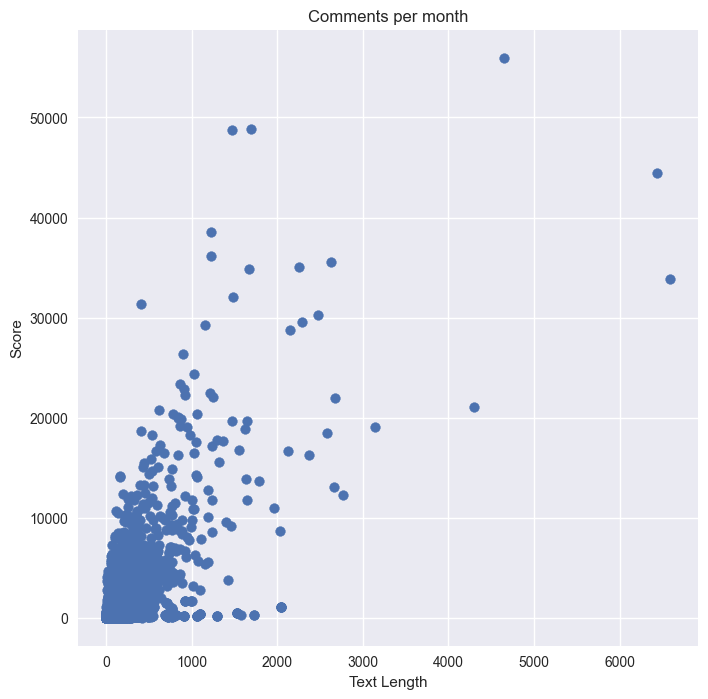

In [58]:
def plot_score_vs_comments():
    
    # Draw
    plt.figure(figsize=(8, 8))
    plt.scatter(x=df['Comments'], y=df['Score'])
    plt.title('Comments per month')
    plt.xlabel('Text Length')
    plt.ylabel('Score')
    plt.legend()
    plt.show();

plot_score_vs_comments()

In [43]:
df['SelfText']

0        Feeling scared? Have you been listening to or ...
1        r/climatechange is a community centered around...
2        It seems like if we could capture all of the c...
3        Taken from a discussion:\r\n\r\nNickel Iron ba...
4        Now we can't avoid hitting 1.5 degrees so I as...
                               ...                        
15970                                                  NaN
15971                                                  NaN
15972                                                  NaN
15973                                                  NaN
15974                                                  NaN
Name: SelfText, Length: 15975, dtype: object

#### Top authors

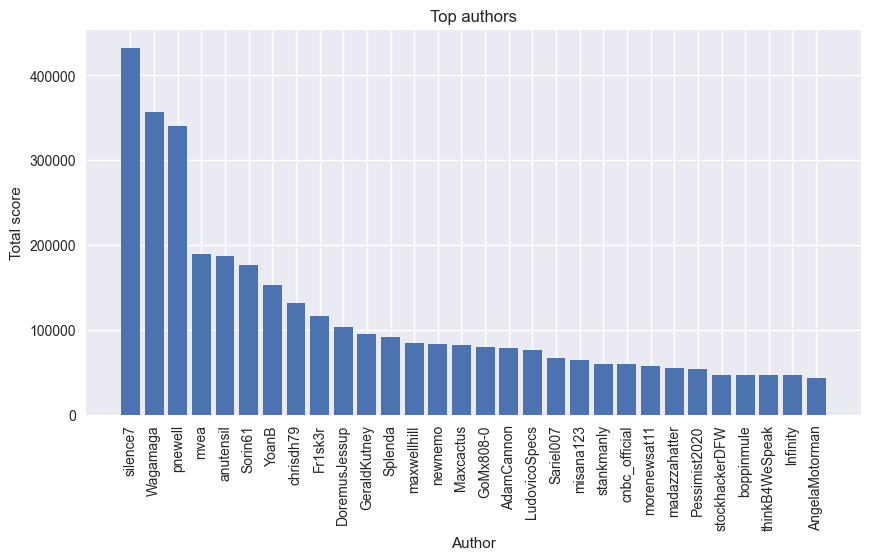

In [100]:
#df.sort_values(by='Score', ascending=False)
def top_authors():
    data = df.groupby(by='Autor').agg({ 'Score': 'sum' }).reset_index().sort_values(by='Score', ascending=False).head(30)

    plt.figure(figsize=(10, 5))
    plt.bar(x=data['Autor'], height=data['Score'])
    plt.title('Top authors')
    plt.xlabel('Author')
    plt.ylabel('Total score')
    plt.xticks(rotation=90)
    plt.show();

top_authors()

#### Popular words in high score posts

In [55]:
df[df['Score'] > 4000]

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked,YearMonth
1888,Pete Buttigieg Has to Keep Explaining to Repub...,4413,wdcmsnbcgay,2023-10-01 13:44:30,130,0.96,16x1lit,climate,False,NaN,False,False,False,False,2023-10-01
6282,Pete Buttigieg Has to Keep Explaining to Repub...,4410,wdcmsnbcgay,2023-10-01 13:44:30,130,0.96,16x1lit,climate,False,NaN,False,False,False,False,2023-10-01
8310,Billions of crabs went missing around Alaska. ...,4384,Azurebluenomad,2023-10-20 00:58:25,741,0.97,17byrco,climatechange,False,NaN,False,False,False,False,2023-10-01
9885,New Republican US House Speaker Champions Foss...,4943,silence7,2023-10-26 14:00:17,520,0.96,17gx72g,climate,False,NaN,False,False,False,False,2023-10-01
11678,Billions of crabs went missing around Alaska. ...,4379,Azurebluenomad,2023-10-20 00:58:25,741,0.97,17byrco,climatechange,False,NaN,False,False,False,False,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,Exxon Could Have Helped Stop Climate Change 30...,4010,silence7,2022-09-20 18:38:31,84,0.99,xjgram,environment,False,NaN,False,False,False,False,2022-09-01
14827,Majority Of National Park Service Board Resign...,4003,mvea,2018-01-17 11:49:35,118,0.95,7r0gfo,environment,False,NaN,False,False,False,False,2018-01-01
14828,Starbucks is eliminating plastic straws from a...,4003,AdamCannon,2018-07-09 11:11:53,221,0.96,8xalp2,environment,False,NaN,False,False,False,False,2018-07-01
14829,#NoMoreExcuses: Mass Action on Capitol Hill to...,4006,dont_tread_on_dc,2018-12-10 16:58:07,114,0.97,a4xej8,environment,False,NaN,False,False,False,False,2018-12-01


correlation matrix

top 10 words

In [60]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize






ImportError: cannot import name 'WordTokenizer' from 'nltk.tokenize' (d:\Git\advanced_python_project\venv\Lib\site-packages\nltk\tokenize\__init__.py)

NEs for the topic top scores